In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [ ]:
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f tdcsfog_metadata.csv
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f defog_metadata.csv
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f daily_metadata.csv
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f events.csv
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f tasks.csv
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f subjects.csv
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f sample_submission.csv

In [ ]:
import pandas as pd
import glob
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Create DataFrames (Metadata)

Δημιουργία DataFrames για τα αρχεία που αφορούν τα metadata.
* tdcsfog_metadata.csv
* defog_metadata.csv
* daily_metadata.csv
* subjects.csv
* tasks.csv
* events.csv

In [ ]:
tdcsfog_metadata = pd.read_csv('/content/tdcsfog_metadata.csv')
defog_metadata = pd.read_csv('/content/defog_metadata.csv')
daily_metadata = pd.read_csv('/content/daily_metadata.csv')
subjects = pd.read_csv('/content/subjects.csv')
tasks = pd.read_csv('/content/tasks.csv')
events = pd.read_csv('/content/events.csv')

In [ ]:
tdcsfog_metadata

,Id,Subject,Visit,Test,Medication
0,003f117e14,4dc2f8,3,2,on
1,009ee11563,f62eec,4,2,on
2,011322847a,231c3b,2,2,on
3,01d0fe7266,231c3b,2,1,off
4,024418ba39,fa8764,19,3,on
...,...,...,...,...,...
828,feba449e1a,312788,19,1,on
829,ff4f844fd3,af82b2,2,3,on
830,ff53514514,3b2403,2,3,on
831,ff92d9244d,2d57c2,20,2,on


In [ ]:
defog_metadata

,Id,Subject,Visit,Medication
0,02ab235146,e1f62e,2,on
1,02ea782681,ae2d35,2,on
2,06414383cf,8c1f5e,2,off
3,092b4c1819,2874c5,1,off
4,0a900ed8a2,0e3d49,2,on
...,...,...,...,...
132,f3a921edee,1a778d,1,off
133,f40e8c6ebe,575c60,1,off
134,f8ddbdd98d,107712,1,on
135,f9efef91fb,5d9cae,2,off


In [ ]:
daily_metadata

,Id,Subject,Visit,Beginning of recording [00:00-23:59]
0,00c4c9313d,fba3a3,1,10:19
1,07a96f89ec,7da72f,1,07:30
2,0d1bc672a8,056372,2,08:30
3,0e333c9833,b4bd22,1,11:30
4,164adaed7b,9f72eb,1,13:00
...,...,...,...,...
60,e658b0aa3d,0e3d49,1,08:00
61,ed0a487f20,9404ad,1,12:30
62,ef1db3ca64,12f8d1,1,08:00
63,f16c5cda55,2874c5,1,08:30


In [ ]:
subjects

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,00f674,2.0,63,M,27.0,43.0,49.0,24
1,00f674,1.0,63,M,27.0,31.0,30.0,26
2,02bc69,NaN,69,M,4.0,21.0,NaN,22
3,040587,2.0,75,M,26.0,52.0,69.0,21
4,040587,1.0,75,M,26.0,47.0,75.0,24
...,...,...,...,...,...,...,...,...
168,f80507,1.0,57,M,2.0,12.0,NaN,0
169,fa8764,NaN,60,F,7.0,30.0,NaN,19
170,fba3a3,1.0,65,F,8.0,28.0,NaN,0
171,fcb9f5,1.0,69,M,3.5,27.0,49.0,23


In [ ]:
tasks

,Id,Begin,End,Task
0,02ab235146,10.000,190.480,Rest1
1,02ab235146,211.240,271.560,Rest2
2,02ab235146,505.880,522.400,4MW
3,02ab235146,577.960,594.640,4MW-C
4,02ab235146,701.320,715.280,MB1
...,...,...,...,...
2812,f9fc61ce85,800.586,810.714,TUG-DT
2813,f9fc61ce85,904.416,926.181,Turning-ST
2814,f9fc61ce85,959.211,989.855,Turning-DT
2815,f9fc61ce85,1087.313,1105.086,Hotspot1


In [ ]:
events

,Id,Init,Completion,Type,Kinetic
0,003f117e14,8.61312,14.7731,Turn,1.0
1,009ee11563,11.38470,41.1847,Turn,1.0
2,009ee11563,54.66470,58.7847,Turn,1.0
3,011322847a,28.09660,30.2966,Turn,1.0
4,01d0fe7266,30.31840,31.8784,Turn,1.0
...,...,...,...,...,...
3539,f9fc61ce85,620.74000,623.8450,Walking,0.0
3540,f9fc61ce85,774.67800,774.8330,Walking,1.0
3541,f9fc61ce85,924.11900,925.6270,Turn,1.0
3542,f9fc61ce85,983.03900,984.0380,Turn,0.0


### Create DataFrames (recordings data)

Λήψη αρχείων καταγραφών tdcsfog που θα συνθέσουν το trainset

Download tdcsfog data used in preprocessing

In [ ]:
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/0330ea6680.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/0506d9a39f.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/03e7159bcc.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/04c2e97800.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/0526a6a0fd.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/02edc527c0.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/009ee11563.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/011322847a.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/04b449020a.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/0494003044.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/01d0fe7266.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/04e10e0797.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/02e8454f57.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/024ba3ebd5.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/03bb0c0c46.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/0383be6b43.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/052a913d06.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/03c9d8dbfa.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/003f117e14.csv' -p /content/train/tdcsfog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/024418ba39.csv' -p /content/train/tdcsfog

Read csv files and create the dataframe for the tdcsfog

In [ ]:
# folder where tdcsfog csv data exist - multiple csv files
folder_path = '/content/train/tdcsfog/'

# Get a list of all CSV files in the folder
file_list = glob.glob(folder_path + '*.csv')

# Initialize an empty list to store the DataFrames
dataframes = []

# Iterate over the file list and read each CSV file into a DataFrame
for file in file_list:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate the DataFrames into a single DataFrame
tdcsfog_df = pd.concat(dataframes, ignore_index=True)

In [ ]:
tdcsfog_df

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.358670,0.601826,-2.876796,0,0,0
1,1,-9.362253,0.599822,-2.873079,0,0,0
2,2,-9.365474,0.601983,-2.878293,0,0,0
3,3,-9.359846,0.598368,-2.876051,0,0,0
4,4,-9.360061,0.598931,-2.874567,0,0,0
...,...,...,...,...,...,...,...
135675,13618,-9.352971,0.815884,-1.868772,0,0,0
135676,13619,-9.377743,0.814042,-1.871012,0,0,0
135677,13620,-9.386903,0.804841,-1.905264,0,0,0
135678,13621,-9.379790,0.793695,-1.920870,0,0,0


Λήψη αρχείων καταγραφών defog που θα συνθέσουν το trainset

Download defog data files

In [ ]:
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/0c55be4384.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/2c12284ed2.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/1ff78d55e9.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/139f60d29b.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/1d99c2eecf.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/13a4fe5159.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/0eaac04f17.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/2e75cf4507.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/0ec76d2d8e.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/15508c7f41.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/06414383cf.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/0d7ab3a9f9.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/2b6a1c294a.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/28209b9006.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/32843e32b6.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/02ea782681.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/092b4c1819.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/18e7abc37e.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/2a01c919c0.csv' -p /content/train/defog
! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/32d03020a9.csv' -p /content/train/defog

Unzip defog data files

In [ ]:
# folder where defog zipped csv data exist - multiple zip files
folder_path = '/content/train/defog/'

# Get a list of all ZIP files in the folder
zip_file_list = glob.glob(folder_path + '*.zip')

# Unzip all the files in the folder
for zip_file in zip_file_list:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(folder_path)
    # Remove the zip file after extracting
    os.remove(zip_file)

Read defog csv files and create a Dataframe

In [ ]:
# folder where defog (unzipped) csv data exist - multiple csv files
folder_path = '/content/train/defog/'

# Get a list of all CSV files in the folder
file_list = glob.glob(folder_path + '*.csv')

# Initialize an empty list to store the DataFrames
dataframes = []

# Iterate over the file list and read each CSV file into a DataFrame
for file in file_list:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate the DataFrames into a single DataFrame
defog_df = pd.concat(dataframes, ignore_index=True)

In [ ]:
defog_df

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-0.906250,0.046875,-0.465332,0,0,0,False,False
1,1,-0.906250,0.046875,-0.456310,0,0,0,False,False
2,2,-0.906250,0.046875,-0.465798,0,0,0,False,False
3,3,-0.906250,0.046875,-0.455838,0,0,0,False,False
4,4,-0.906250,0.046875,-0.468750,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...
3068848,182655,-0.984041,0.068054,-0.173262,0,0,0,False,False
3068849,182656,-0.986285,0.067161,-0.171767,0,0,0,False,False
3068850,182657,-0.985703,0.068139,-0.171534,0,0,0,False,False
3068851,182658,-0.987393,0.070450,-0.173982,0,0,0,False,False


Ένωση DataFrames (tdcsfog + defog). Το column Test που δεν υπάρχει στο defog θα λάβει NaN values

Concatenate tdcsfog & defog dataframes

In [ ]:
all_data_df = pd.concat( [tdcsfog_df, defog_df], ignore_index=True)

In [ ]:
all_data_df

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:162: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),


,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-9.358670,0.601826,-2.876796,0,0,0,NaN,NaN
1,1,-9.362253,0.599822,-2.873079,0,0,0,NaN,NaN
2,2,-9.365474,0.601983,-2.878293,0,0,0,NaN,NaN
3,3,-9.359846,0.598368,-2.876051,0,0,0,NaN,NaN
4,4,-9.360061,0.598931,-2.874567,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3204528,182655,-0.984041,0.068054,-0.173262,0,0,0,False,False
3204529,182656,-0.986285,0.067161,-0.171767,0,0,0,False,False
3204530,182657,-0.985703,0.068139,-0.171534,0,0,0,False,False
3204531,182658,-0.987393,0.070450,-0.173982,0,0,0,False,False


### Class distribution in dataset

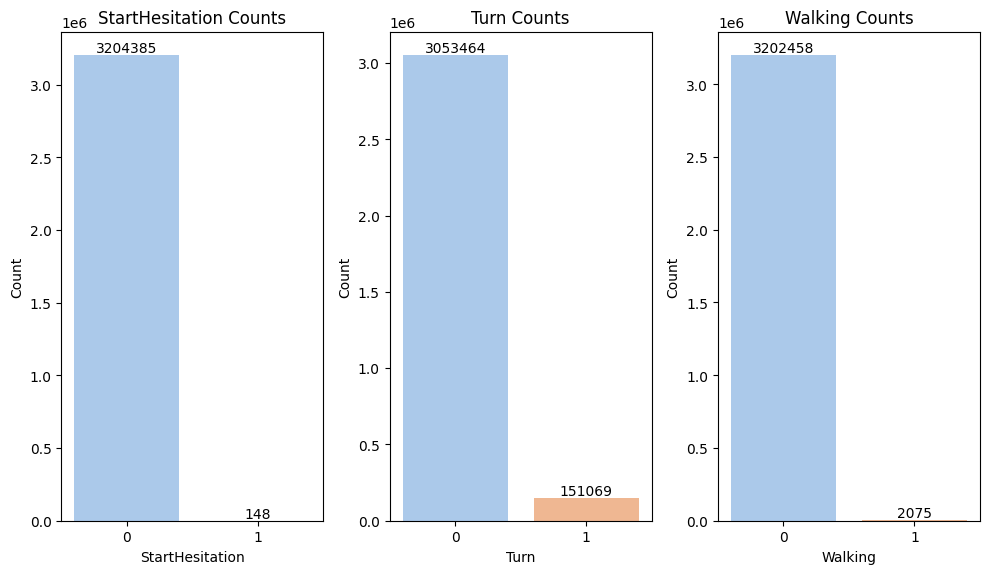

In [ ]:
# Count the occurrences of each class
start_hesitation_counts = all_data_df['StartHesitation'].value_counts()
turn_counts = all_data_df['Turn'].value_counts()
walking_counts = all_data_df['Walking'].value_counts()

# Set a custom color palette
colors = sns.color_palette("pastel")

# Create the bar plots
plt.figure(figsize=(10, 6))  # Set the figure size

# Bar plot for StartHesitation
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=all_data_df, x='StartHesitation', palette=colors)
plt.xlabel("StartHesitation")
plt.ylabel("Count")
plt.title("StartHesitation Counts")

# Add value labels to the bars
for p, count in zip(ax1.patches, start_hesitation_counts):
    ax1.annotate(str(count), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

# Bar plot for Turn
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=all_data_df, x='Turn', palette=colors)
plt.xlabel("Turn")
plt.ylabel("Count")
plt.title("Turn Counts")

# Add value labels to the bars
for p, count in zip(ax2.patches, turn_counts):
    ax2.annotate(str(count), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

# Bar plot for Walking
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=all_data_df, x='Walking', palette=colors)
plt.xlabel("Walking")
plt.ylabel("Count")
plt.title("Walking Counts")

# Add value labels to the bars
for p, count in zip(ax3.patches, walking_counts):
    ax3.annotate(str(count), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


First of all, we observe that in every class the quantity of zeros (0) significantly surpasses that of aces (1), meaning that we have few freezing-of-gait(FOG) episodes compared to no-freezing events.   

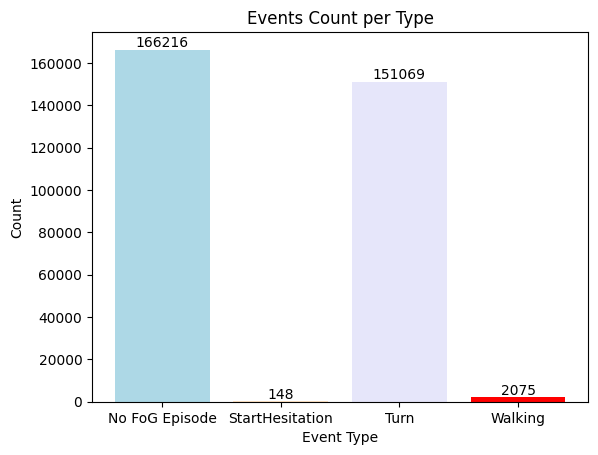

In [ ]:
# Count the occurrences of each class
all_zeros = ((all_data_df['StartHesitation'] == 0) & (all_data_df['Turn'] == 0) & (df['Walking'] == 0)).sum()
start_hesitation_ones = (all_data_df['StartHesitation'] == 1).sum()
turn_ones = (all_data_df['Turn'] == 1).sum()
walking_ones = (all_data_df['Walking'] == 1).sum()

# Create the bar plot
plt.bar(['No FoG Episode', 'StartHesitation', 'Turn', 'Walking'],
        [all_zeros, start_hesitation_ones, turn_ones, walking_ones],
        color=['lightblue', 'bisque', 'lavender', 'red'])

plt.xlabel("Event Type")
plt.ylabel("Count")
plt.title("Events Count per Type")

# Add value labels to the bars
for i, count in enumerate([all_zeros, start_hesitation_ones, turn_ones, walking_ones]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


Furthermore, we observe that the classes are imbalanced. We observe 3051241 No FoG (Normal) events, 148 StartHesitation events, 151069 Turn events, 2075 Walking events.

### Correlation Matrix

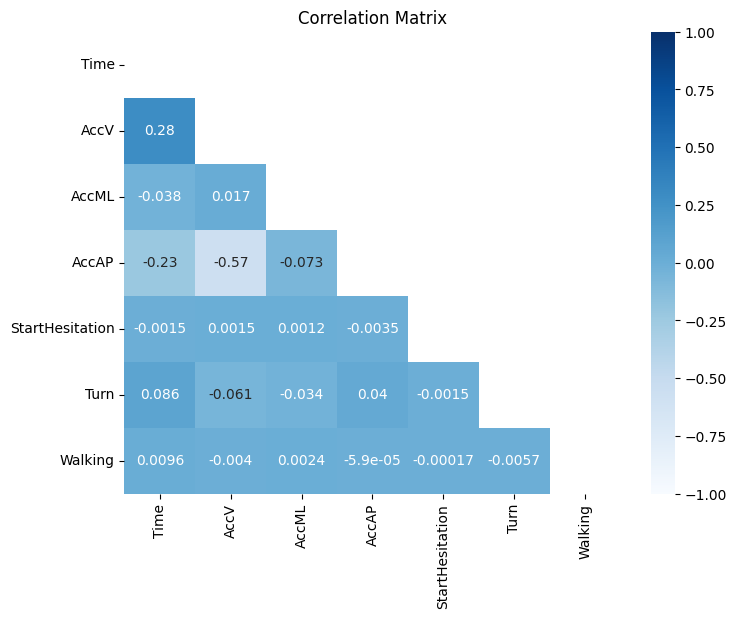

In [ ]:
# Exclude columns "task" and "valid"
columns_to_exclude = ["Task", "Valid"]
features = all_data_df.drop(columns=columns_to_exclude)

# Create correlation matrix
corr_matrix = features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


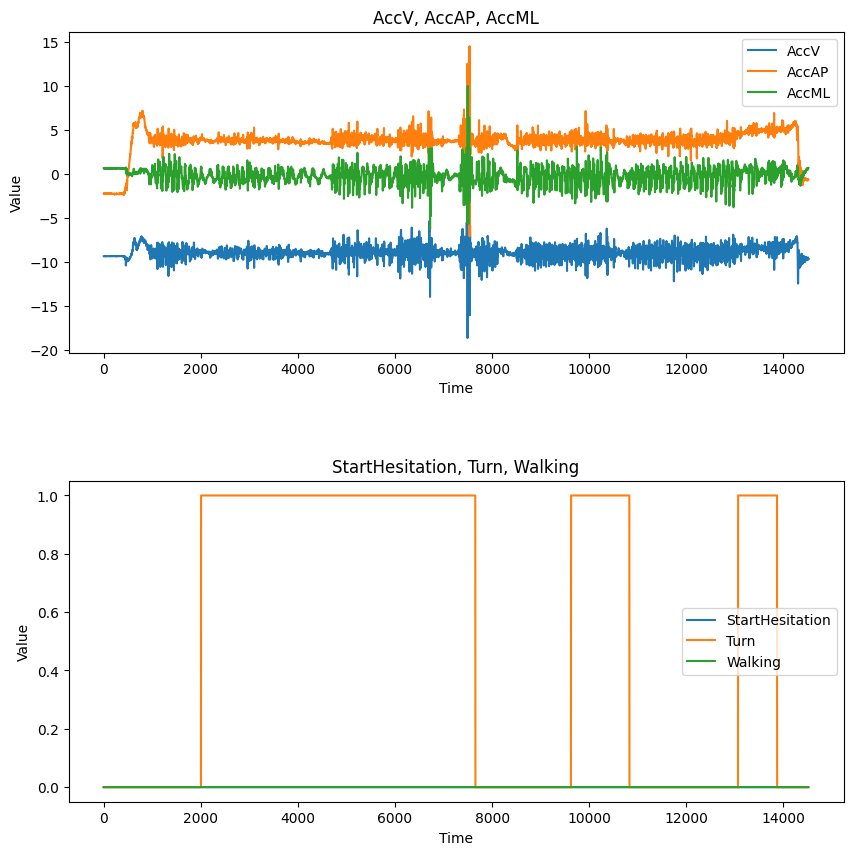

In [ ]:
df =  pd.read_csv('/content/train/tdcsfog/04e10e0797.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plotting AccV vs Time
ax1.plot(df['Time'], df['AccV'], label='AccV')
# Plotting AccAP vs Time
ax1.plot(df['Time'], df['AccAP'], label='AccAP')
# Plotting AccML vs Time
ax1.plot(df['Time'], df['AccML'], label='AccML')

# 1st subplot
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.set_title('AccV, AccAP, AccML')
ax1.legend()

# Plotting StartHesitation vs Time
ax2.plot(df['Time'], df['StartHesitation'], label='StartHesitation')
# Plotting Turn vs Time
ax2.plot(df['Time'], df['Turn'], label='Turn')
# Plotting Walking vs Time
ax2.plot(df['Time'], df['Walking'], label='Walking')

# 2nd subplot
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.set_title('StartHesitation, Turn, Walking')
ax2.legend()


plt.subplots_adjust(hspace=0.4)
plt.show()

### Events Analysis

Events metadata analysis

In [ ]:
events

,Id,Init,Completion,Type,Kinetic,Duration
0,003f117e14,8.61312,14.7731,Turn,1.0,6.15998
1,009ee11563,11.38470,41.1847,Turn,1.0,29.80000
2,009ee11563,54.66470,58.7847,Turn,1.0,4.12000
3,011322847a,28.09660,30.2966,Turn,1.0,2.20000
4,01d0fe7266,30.31840,31.8784,Turn,1.0,1.56000
...,...,...,...,...,...,...
3539,f9fc61ce85,620.74000,623.8450,Walking,0.0,3.10500
3540,f9fc61ce85,774.67800,774.8330,Walking,1.0,0.15500
3541,f9fc61ce85,924.11900,925.6270,Turn,1.0,1.50800
3542,f9fc61ce85,983.03900,984.0380,Turn,0.0,0.99900


Type
StartHesitation    22.343252
Turn                9.532709
Walking             6.554683
Name: Duration, dtype: float64


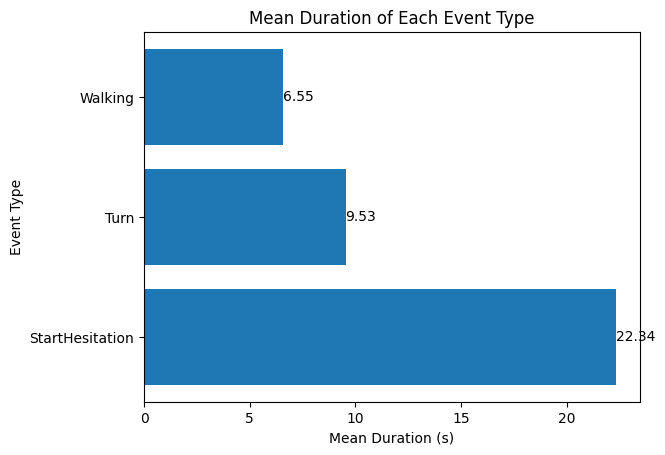

In [ ]:
# Calculate the duration for each event
events['Duration'] = events['Completion'] - events['Init']

# Mean duration for each type of events
mean_durations = events.groupby('Type')['Duration'].mean()
print(mean_durations)
# Horizontal bar plot
plt.barh(mean_durations.index, mean_durations)
plt.xlabel('Mean Duration (s)')
plt.ylabel('Event Type')
plt.title('Mean Duration of Each Event Type')

# Add value labels to the bars
for i, v in enumerate(mean_durations):
    plt.text(v, i, str(round(v, 2)), va='center')

plt.show()


Υπολογισμός πλήθους των διάφορων τύπων των events στο σύνολο των δεδομένων. (όχι στο train set)

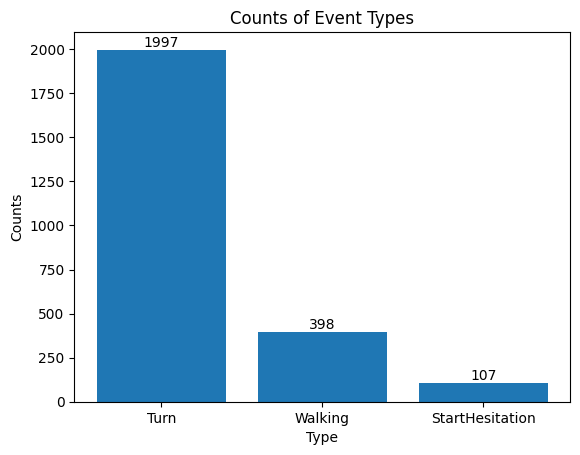

In [ ]:
# Counts of each type
type_counts = events['Type'].value_counts()

# bar plot
plt.bar(type_counts.index, type_counts.values)

# Add value labels to each bar
for i, v in enumerate(type_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')


plt.xlabel('Type')
plt.ylabel('Counts')
plt.title('Counts of Event Types')
plt.show()

### Tdcsfog & defog metadata analysis
Συνένωση πινάκων metadata για tdcsfog και defog

In [ ]:
all_metadata = pd.concat( [tdcsfog_metadata, defog_metadata], ignore_index=True)
merged_df = events.merge(all_metadata, on='Id')

In [ ]:
merged_df

,Id,Init,Completion,Type,Kinetic,Duration,Subject,Visit,Test,Medication
0,003f117e14,8.61312,14.7731,Turn,1.0,6.15998,4dc2f8,3,2.0,on
1,009ee11563,11.38470,41.1847,Turn,1.0,29.80000,f62eec,4,2.0,on
2,009ee11563,54.66470,58.7847,Turn,1.0,4.12000,f62eec,4,2.0,on
3,011322847a,28.09660,30.2966,Turn,1.0,2.20000,231c3b,2,2.0,on
4,01d0fe7266,30.31840,31.8784,Turn,1.0,1.56000,231c3b,2,1.0,off
...,...,...,...,...,...,...,...,...,...,...
3539,f9fc61ce85,620.74000,623.8450,Walking,0.0,3.10500,040587,1,NaN,on
3540,f9fc61ce85,774.67800,774.8330,Walking,1.0,0.15500,040587,1,NaN,on
3541,f9fc61ce85,924.11900,925.6270,Turn,1.0,1.50800,040587,1,NaN,on
3542,f9fc61ce85,983.03900,984.0380,Turn,0.0,0.99900,040587,1,NaN,on


In [ ]:
# number of events with medication on
events_med_on = merged_df[merged_df['Medication'] == 'on'].shape[0]

# number of events with medication off
events_med_off = merged_df[merged_df['Medication'] == 'off'].shape[0]

print("Number of Events (Medication On):", events_med_on)
print("Number of Events (Medication Off):", events_med_off)

Number of Events (Medication On): 1418
Number of Events (Medication Off): 2126


Σύγκριση τύπων events με και χωρίς medication.

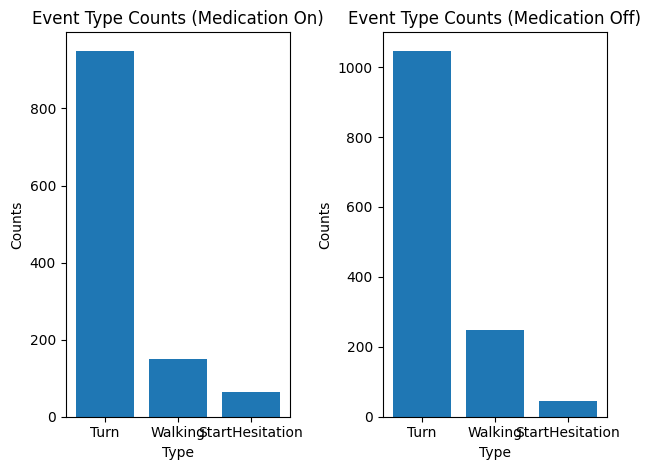

In [ ]:
# Filter the dataframe for medication on and calculate count
med_on_counts = merged_df[merged_df['Medication'] == 'on']['Type'].value_counts()

# Create a bar plot for medication on
plt.subplot(1, 2, 1)
plt.bar(med_on_counts.index, med_on_counts.values)
plt.xlabel('Type')
plt.ylabel('Counts')
plt.title('Event Type Counts (Medication On)')

# Filter the dataframe for medication off and calculate count
med_off_counts = merged_df[merged_df['Medication'] == 'off']['Type'].value_counts()

# Create a bar plot for medication off
plt.subplot(1, 2, 2)
plt.bar(med_off_counts.index, med_off_counts.values)
plt.xlabel('Type')
plt.ylabel('Counts')
plt.title('Event Type Counts (Medication Off)')

plt.tight_layout()
plt.show()

Το ίδιο με πριν απλώς σε ποσοστό

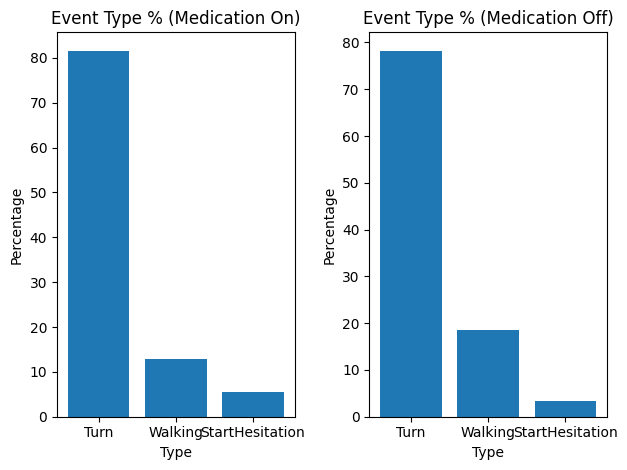

In [ ]:
# Filter the dataframe for medication on and calculate count
med_on_counts = merged_df[merged_df['Medication'] == 'on']['Type'].value_counts()

# Calculate the percentage of each type for medication on
med_on_percentages = (med_on_counts / med_on_counts.sum()) * 100

# Create a bar plot for medication on with percentages
plt.subplot(1, 2, 1)
plt.bar(med_on_percentages.index, med_on_percentages.values)
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Event Type % (Medication On)')

# Filter the dataframe for medication off and calculate count
med_off_counts = merged_df[merged_df['Medication'] == 'off']['Type'].value_counts()

# Calculate the percentage of each type for medication off
med_off_percentages = (med_off_counts / med_off_counts.sum()) * 100

# Create a bar plot for medication off with percentages
plt.subplot(1, 2, 2)
plt.bar(med_off_percentages.index, med_off_percentages.values)
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Event Type % (Medication Off)')


plt.tight_layout()
plt.show()


Το ίδιο με πριν απλώς σε piecharts

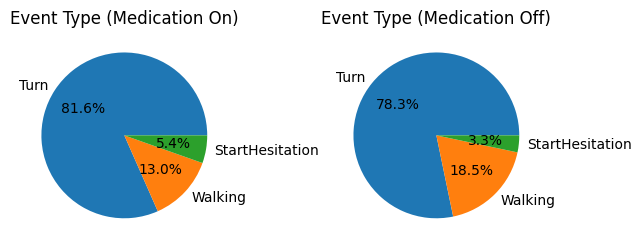

In [ ]:
# Filter the dataframe for medication on
med_on_counts = merged_df[merged_df['Medication'] == 'on']['Type'].value_counts()

# Create a pie chart for medication on
plt.subplot(1, 2, 1)
plt.pie(med_on_counts, labels=med_on_counts.index, autopct='%1.1f%%')
plt.title('Event Type (Medication On)')

# Filter the dataframe for medication off
med_off_counts = merged_df[merged_df['Medication'] == 'off']['Type'].value_counts()

# Create a pie chart for medication off
plt.subplot(1, 2, 2)
plt.pie(med_off_counts, labels=med_off_counts.index, autopct='%1.1f%%')
plt.title('Event Type (Medication Off)')

plt.tight_layout()
plt.show()


In [ ]:
new_df = merged_df.drop('Visit', axis=1)

Ένωση με subjects για προσθήκη της πληροφορίας για τα subjects που συμμετέχουν στα events. Αγνοούνται εγγραφές για το ίδιο subjects που διαφοροποιούνται στην ουσία στο column visit καθώς το συγκεκριμένο στοιχείο δεν θα εξεταστεί στην ενότητα αυτή.

In [ ]:
unique_subjects_df = subjects.drop_duplicates(subset='Subject').copy()
merged_sub = new_df.merge(unique_subjects_df, on='Subject')

In [ ]:
merged_sub

,Id,Init,Completion,Type,Kinetic,Subject,Test,Medication,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,003f117e14,8.61312,14.7731,Turn,1.0,4dc2f8,2.0,on,NaN,68,F,9.0,17.0,15.0,15
1,2ca9bd3533,19.94970,21.9097,Turn,1.0,4dc2f8,3.0,on,NaN,68,F,9.0,17.0,15.0,15
2,2ca9bd3533,33.72970,34.6897,Walking,1.0,4dc2f8,3.0,on,NaN,68,F,9.0,17.0,15.0,15
3,2ca9bd3533,37.32970,38.0097,Walking,1.0,4dc2f8,3.0,on,NaN,68,F,9.0,17.0,15.0,15
4,64e69dbfab,11.24810,14.6081,Turn,1.0,4dc2f8,1.0,on,NaN,68,F,9.0,17.0,15.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,f9efef91fb,1196.55400,1200.0870,Walking,0.0,5d9cae,NaN,off,1.0,72,F,14.0,13.0,33.0,15
3540,f9efef91fb,1200.40000,1200.5820,Walking,1.0,5d9cae,NaN,off,1.0,72,F,14.0,13.0,33.0,15
3541,f9efef91fb,1206.75600,1207.1370,Turn,1.0,5d9cae,NaN,off,1.0,72,F,14.0,13.0,33.0,15
3542,f9efef91fb,1218.58200,1220.9530,Turn,0.0,5d9cae,NaN,off,1.0,72,F,14.0,13.0,33.0,15


Έλεγχος αν το πεδίο type περιλαμβάνει NaN τιμές.

In [ ]:
has_nan_values = merged_sub['Type'].isnull().any()
print(has_nan_values)

True


Υπολογισμός events που αφορούσαν Male/Female

In [ ]:
# Calculate the events for Sex=M
events_male = merged_sub[merged_sub['Sex'] == 'M'].groupby('Sex')['Type'].count()

# Calculate the events for Sex=F
events_female = merged_sub[merged_sub['Sex'] == 'F'].groupby('Sex')['Type'].count()

print("Mean Events for Sex=M: {}".format(events_male[0]))
print("Mean Events for Sex=F: {}".format(events_female[0]))


Mean Events for Sex=M: 1810
Mean Events for Sex=F: 692


Υπολογισμός ποσοστών ανά τύπο event για Male/Female

In [ ]:
# Calculate the total number of events for Sex=M
total_events_male = merged_sub[merged_sub['Sex'] == 'M']['Type'].count()

# Calculate the percentage of events in each type for Sex=M
percentage_male = merged_sub[merged_sub['Sex'] == 'M'].groupby('Type')['Id'].count() / total_events_male * 100

# Calculate the total number of events for Sex=F
total_events_female = merged_sub[merged_sub['Sex'] == 'F']['Type'].count()

# Calculate the percentage of events in each type for Sex=F
percentage_female = merged_sub[merged_sub['Sex'] == 'F'].groupby('Type')['Id'].count() / total_events_female * 100


print("Percentage of Events for Sex=M:")
print(percentage_male)

print("Percentage of Events for Sex=F:")
print(percentage_female)

Percentage of Events for Sex=M:
Type
StartHesitation     4.143646
Turn               84.530387
Walking            11.325967
Name: Id, dtype: float64
Percentage of Events for Sex=F:
Type
StartHesitation     4.624277
Turn               67.485549
Walking            27.890173
Name: Id, dtype: float64


Γραφική αναπαράσταση ποσοστών

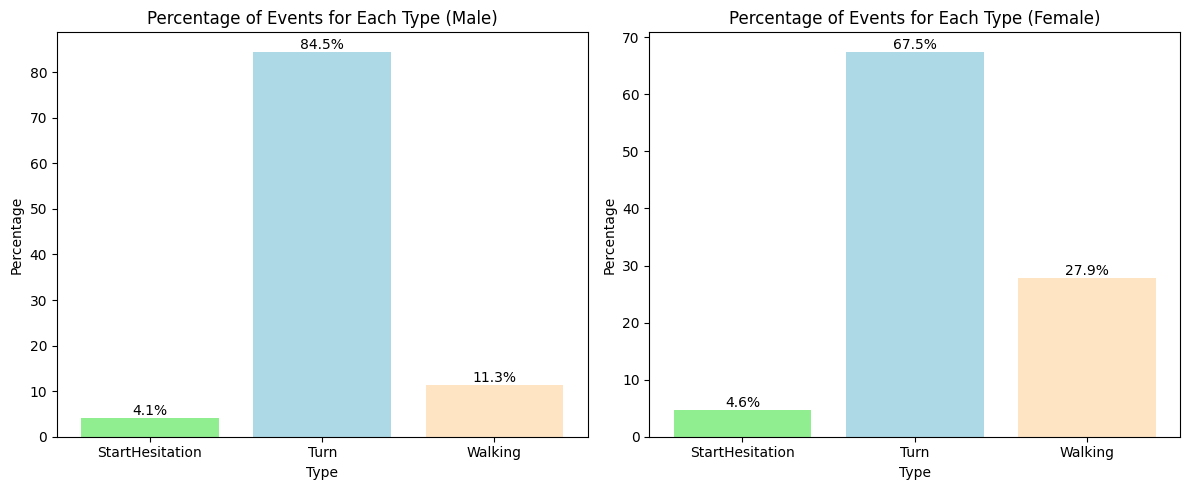

In [ ]:
# Create subplots for Sex=M and Sex=F
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = ['lightgreen', 'lightblue', 'bisque', 'yellow', 'orange']

ax1.bar(percentage_male.index, percentage_male.values, color=colors)

# Add value labels to the bars in the first plot
for i, v in enumerate(percentage_male.values):
    ax1.text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Plot for Sex=M
ax1.set_xlabel('Type')
ax1.set_ylabel('Percentage')
ax1.set_title('Percentage of Events for Each Type (Male)')
# Plot for Sex=F
ax2.bar(percentage_female.index, percentage_female.values, color=colors)

# Add value labels to the bars in the first plot
for i, v in enumerate(percentage_female.values):
    ax2.text(i, v, f"{v:.1f}%", ha='center', va='bottom')

ax2.set_xlabel('Type')
ax2.set_ylabel('Percentage')
ax2.set_title('Percentage of Events for Each Type (Female)')


plt.tight_layout()
plt.show()


### Subjects Analysis

In [ ]:
subjects

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,00f674,2.0,63,M,27.0,43.0,49.0,24
1,00f674,1.0,63,M,27.0,31.0,30.0,26
2,02bc69,NaN,69,M,4.0,21.0,NaN,22
3,040587,2.0,75,M,26.0,52.0,69.0,21
4,040587,1.0,75,M,26.0,47.0,75.0,24
...,...,...,...,...,...,...,...,...
168,f80507,1.0,57,M,2.0,12.0,NaN,0
169,fa8764,NaN,60,F,7.0,30.0,NaN,19
170,fba3a3,1.0,65,F,8.0,28.0,NaN,0
171,fcb9f5,1.0,69,M,3.5,27.0,49.0,23


Στο DataFrame subjects μπορεί να υπάρχει ένα subject παραπάνω από μία φορά. Άρα δεν είναι όλα διαφορετικά. Αυτό συμβάνει πχ για τις γραμμές 0,1 παραπάνω. Όπου είναι το ίδιο subject. Απλώς (μάλλον) η γραμμή 0 αφορά την επίσκεψη 2 και η γραμμή 1 την επίσκεψη 1. (Δεν έχουμε αποκλείσει Visit=2.0 να εννοεί και τις 2 επισκέψεις μαζί - αλλά μάλλον πιο πιθανό το άλλο σενάριο)

Αριθμός μοναδικών συμμετεχόντων.

In [ ]:
num_subjects = subjects['Subject'].nunique()
print("Number of unique subjects:", num_subjects)


Number of unique subjects: 136


Δημιουργία DataFrame που να περιέχει μόνο τα μοναδικά subjects για ανάλυση των Age,Sex,YearsSinceDx που δεν εξαρτώνται από τις διαφορετικές τιμές του Visit.

In [ ]:
unique_subjects_df = subjects.drop_duplicates(subset='Subject').copy()

Υπολογισμός μέσης ηλικίας και αναπαράσταση σε ιστόγραμμα και box plot

In [ ]:
mean_age = unique_subjects_df['Age'].mean()

# Mean age
print("Mean age: {:0.2f}".format(mean_age))

Mean age: 67.82


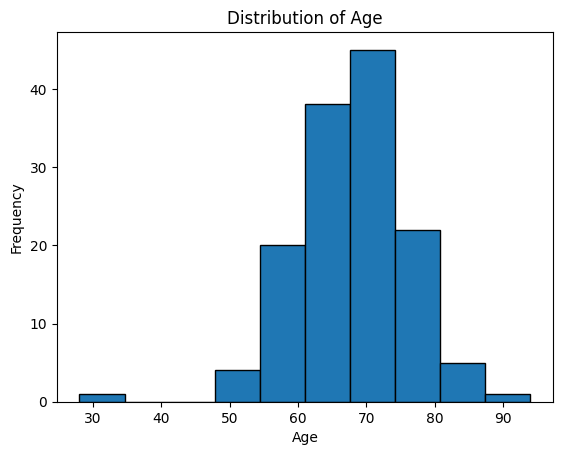

In [ ]:
# histogram
plt.hist(unique_subjects_df['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

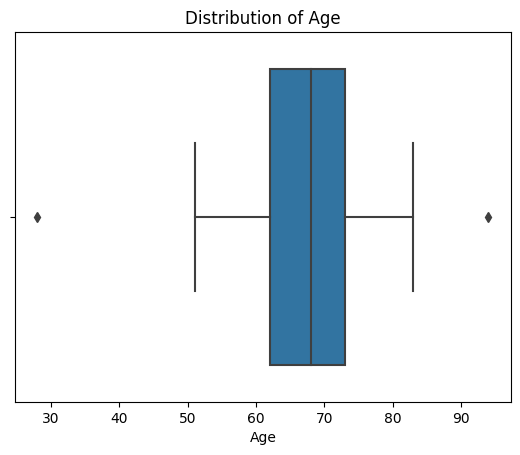

In [ ]:
# box plot
sns.boxplot(x='Age', data=unique_subjects_df)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

Υπολογισμός πλήθους ανά φύλο.

In [ ]:
sex_counts = unique_subjects_df['Sex'].value_counts()

# Displaying the different values of 'Sex' and their counts
print(sex_counts)


M    96
F    40
Name: Sex, dtype: int64


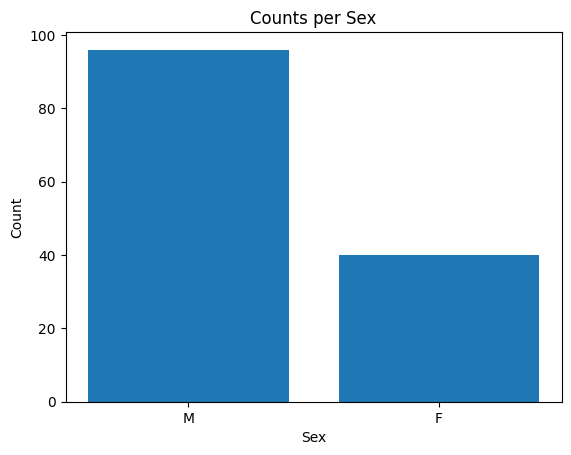

In [ ]:
sex_counts = unique_subjects_df['Sex'].value_counts()


plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Counts per Sex')
plt.show()


Κατανομή Years Since Diagnosis

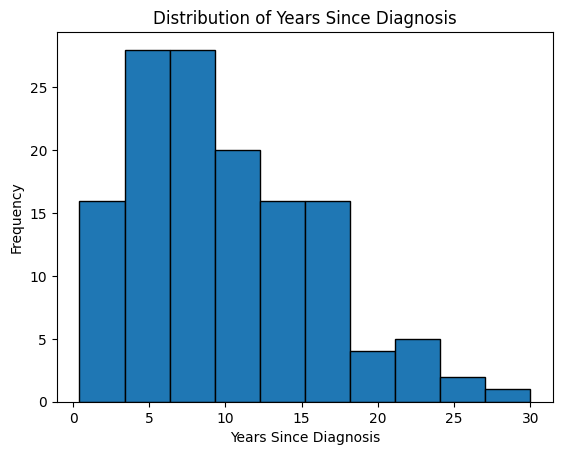

In [ ]:
# histogram
plt.hist(unique_subjects_df['YearsSinceDx'], bins=10, edgecolor='black')
plt.xlabel('Years Since Diagnosis')
plt.ylabel('Frequency')
plt.title('Distribution of Years Since Diagnosis')
plt.show()


Υπολογισμός μέσης τιμής και τυπικής απόκλισης για το YearSinceDx.

In [ ]:
# Calculate mean and standard deviation
mean_years_since_dx = unique_subjects_df['YearsSinceDx'].mean()
std_years_since_dx = unique_subjects_df['YearsSinceDx'].std()

print("Mean of YearsSinceDx {:0.2f} and Standard Deviation {:0.2f}".format(mean_years_since_dx,std_years_since_dx ))


Mean of YearsSinceDx 9.95 and Standard Deviation 6.17


Υπολογισμός μέσης τιμής και τυπικής απόκλισης για το YearSinceDx ανά ηλικιακή ομάδα.

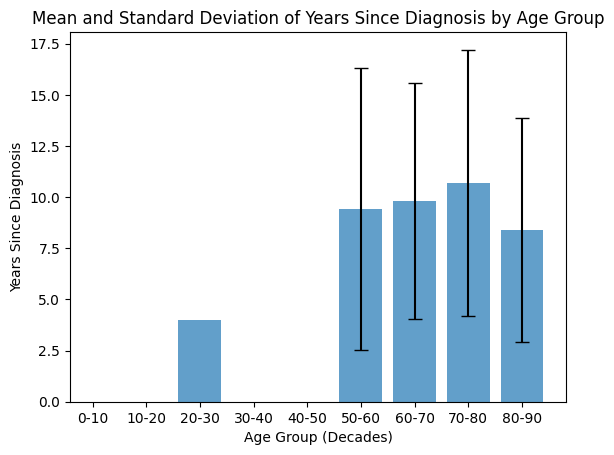

In [ ]:
# Define the age bins representing each decade
age_bins = np.arange(0, 100, 10)

# Group the dataframe by age bins and calculate mean and standard deviation of 'YearsSinceDx'
age_stats = unique_subjects_df.groupby(pd.cut(unique_subjects_df['Age'], age_bins))['YearsSinceDx'].agg(['mean', 'std'])

# Extract the age bin labels and their corresponding mean and standard deviation values
age_labels = [f"{int(bin.left)}-{int(bin.right)}" for bin in age_stats.index]
mean_values = age_stats['mean']
std_values = age_stats['std']

# Create a bar plot with error bars
plt.bar(age_labels, mean_values, yerr=std_values, align='center', alpha=0.7, capsize=5)

plt.xlabel('Age Group (Decades)')
plt.ylabel('Years Since Diagnosis')
plt.title('Mean and Standard Deviation of Years Since Diagnosis by Age Group')
plt.show()



Υπολογισμός μέσης τιμής και τυπικής απόκλισης για τα UPDRSIIIOn/UPDRSIIIOff (Unified Parkinson's Disease Rating Scale score during on/off medication respectively)

In [ ]:
mean_UPDRSIII_On = subjects['UPDRSIII_On'].mean()
mean_UPDRSIII_Off = subjects['UPDRSIII_Off'].mean()

std_UPDRSIII_On = subjects['UPDRSIII_On'].std()
std_UPDRSIII_Off = subjects['UPDRSIII_Off'].std()

print("Mean UPDRSIII_On: {:0.2f} , std {:0.2f}".format(mean_UPDRSIII_On,std_UPDRSIII_On ))
print("Mean UPDRSIII_Off: {:0.2f}, std {:0.2f}".format(mean_UPDRSIII_Off,std_UPDRSIII_Off ))


Mean UPDRSIII_On: 34.27 , std 12.73
Mean UPDRSIII_Off: 42.88, std 13.00


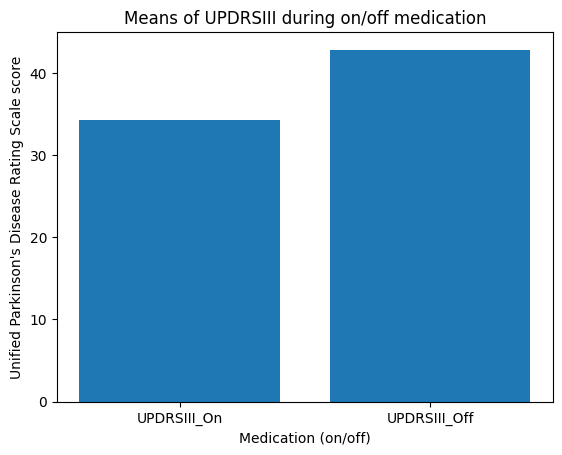

In [ ]:
# Create a bar plot
labels = ['UPDRSIII_On', 'UPDRSIII_Off']
means = [mean_UPDRSIII_On, mean_UPDRSIII_Off]

plt.bar(labels, means)


plt.xlabel("Medication (on/off)")
plt.ylabel("Unified Parkinson's Disease Rating Scale score")
plt.title('Means of UPDRSIII during on/off medication')
plt.show()


### Hypothesis Testing

Correlation

Για το correlation με τα age, sex κτλπ σε σχέση με τον αριθμο των events, θα έπρεπε να γίνει υπολογισμός ως προς το χρόνο, κάτι που θα απαιτούσε ίσως την ανάλυση όλων των αρχείων καταγραφών.

<ipython-input-266-9cccf272af78>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = features.corr()


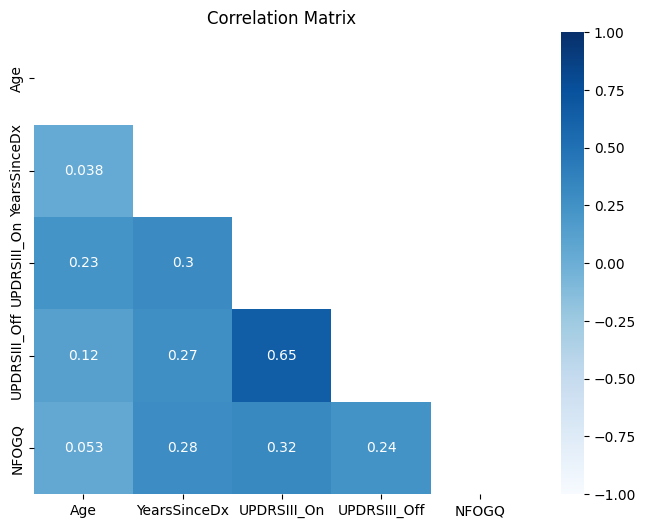

In [ ]:
# Exclude columns "task" and "valid"
columns_to_exclude = ["Visit"]
features = subjects.drop(columns=columns_to_exclude)

# Create correlation matrix
corr_matrix = features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()